# Logistic Regression Case Study on Lead Scoring



### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.
Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, **the company wishes to identify the most potential leads, also known as ‘Hot Leads’**.
If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

<img src="https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg">

                  
                                
                               Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.
In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.**The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.**

### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

### Goal

There are quite a few goals for this case study.

* **Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.**


## Data importing and Understanding

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
#Reading Data
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
leads.shape

(9240, 37)

## Data Cleaning

Since there are so many different types of null values in many columns, we will go column by column and see what can be done with them.



In [5]:
# Calculating the total percentage of nulls per column

(leads.isnull().sum()/ leads.shape[0]) *100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [6]:
# Converting 'Select' values to NaN.

leads = leads.replace('Select', np.nan)

In [7]:
# Also converting all Yes to 1 and No to 0

leads = leads.replace({'Yes':1, 'No':0})

In [8]:
#Dropping Null values from Total Visits

leads['TotalVisits'].dropna(inplace=True)

In [9]:
# Calculating the total percentage of nulls per column after Converting 'Select' values to Null

(leads.isnull().sum()/ leads.shape[0]) *100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
# Dropping useless column Prospect ID since we already have a unique identifier in Lead Number

leads.drop(['Prospect ID'], axis=1, inplace=True)

#### 'Country' column

In [11]:
leads.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Canada                  0.000590
Nigeria                 0.000590
Kuwait                  0.000590
Germany                 0.000590
South Africa            0.000590
Sweden                  0.000443
Asia/Pacific Region     0.000295
Philippines             0.000295
Ghana                   0.000295
Bangladesh              0.000295
Netherlands             0.000295
Uganda                  0.000295
China                   0.000295
Italy                   0.000295
Belgium                 0.000295
Kenya                   0.000148
Indonesia               0.000148
Denmark   

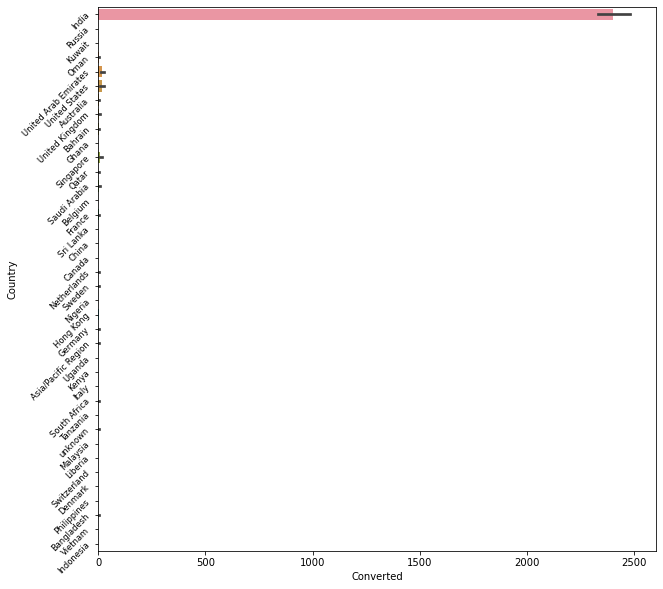

In [12]:
plt.figure(figsize=(10,10))
countryPlot = sns.barplot(y='Country', x='Converted',estimator=sum, data=leads)
countryPlot.set_yticklabels(countryPlot.get_yticklabels(), rotation=45, 
                            horizontalalignment='right', fontweight='light', fontsize='small')
plt.show()

In [13]:
#Since Country column is skewed with 'India' being the maximum values, so its better to drop that column.
leads.drop(['Country'], axis=1, inplace=True)

#### '**Specialization**' column

In [14]:
# Checking the percentage of each value in the column, and also the total nulls

display(leads['Specialization'].value_counts(normalize=True))
print('Number of nulls: ', leads['Specialization'].isnull().sum())

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

Number of nulls:  3380


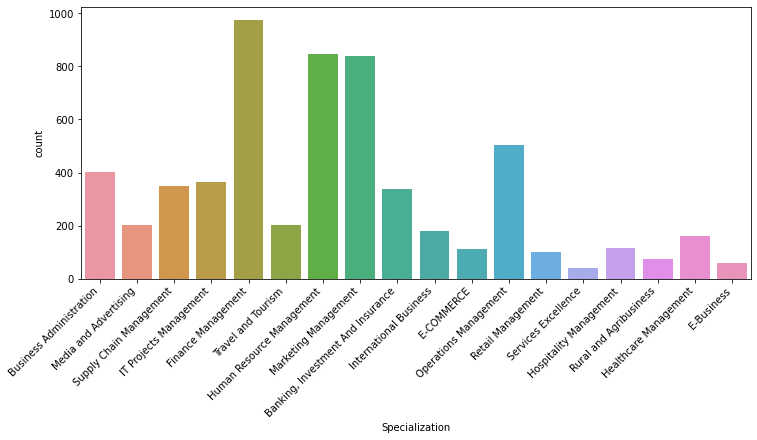

In [15]:
# Plotting the Specialization variable count of each value

plt.figure(figsize=(12,5))
SpecializationPlot= sns.countplot(leads['Specialization'])
SpecializationPlot.set_xticklabels(SpecializationPlot.get_xticklabels(), rotation=45, 
                            horizontalalignment='right', fontweight='light', fontsize='medium')
plt.show()

In [16]:
leads['Specialization'].replace({np.nan: 'Other'}, inplace = True)

# Checking nulls after imputation
print('Number of nulls: ', leads['Specialization'].isnull().sum())

#As we can see, nulls have become 0

Number of nulls:  0


#### 'How did you hear about X Education' column

Online Search            0.406030
Word Of Mouth            0.174874
Student of SomeSchool    0.155779
Other                    0.093467
Multiple Sources         0.076382
Advertisements           0.035176
Social Media             0.033668
Email                    0.013065
SMS                      0.011558
Name: How did you hear about X Education, dtype: float64

Percentage of nulls:  0.7846320346320347


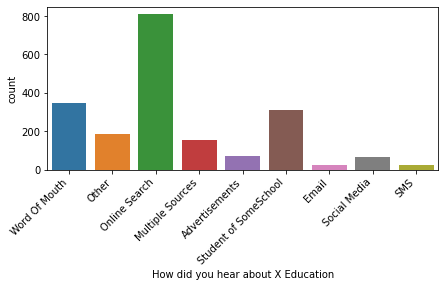

In [17]:
plt.figure(figsize=(7,3))
HearingPlot = sns.countplot(leads['How did you hear about X Education'])
HearingPlot.set_xticklabels(HearingPlot.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='medium')
display(leads['How did you hear about X Education'].value_counts(normalize=True))
print('Percentage of nulls: ', leads['How did you hear about X Education'].isnull().sum()/leads.shape[0])
plt.show()

There are already around 78% nulls in this column, Also, this column shows where the customer heard about X Education, which is not an important factor in helping to improve our conversion rate. Thus, we will drop this column.

In [18]:
leads.drop(['How did you hear about X Education'], axis='columns', inplace=True)

#### 'What is your current occupation' column

In [19]:
# Changing the name of column What is your current occupation to Occupation

leads.rename({'What is your current occupation' : 'Occupation'}, axis=1, inplace=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: Occupation, dtype: float64

Percentage of null values:  0.2911255411255411


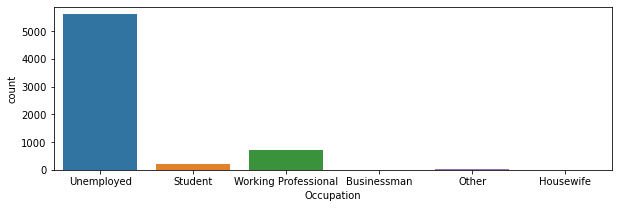

In [20]:
# Plotting occupation against Conversions

plt.figure(figsize=(10,3))
sns.countplot(leads['Occupation'])
display(leads['Occupation'].value_counts(normalize=True))
print('Percentage of null values: ', leads['Occupation'].isnull().sum()/leads.shape[0])

There are about 29% null values in this column. As we can also see from the data and plot above, the maximum number(about 85%) of people are Unemployed, so we can safely impute the nulls with value 'Unemployed'.

In [21]:
leads['Occupation'].replace({np.nan: 'Unemployed'}, inplace=True)

# Checking null percentage again after imputation
print('Percentage of null values: ', leads['Occupation'].isnull().sum()/leads.shape[0])

#As we can see, nulls have become 0 in this column too.

Percentage of null values:  0.0


#### 'What matters most to you in choosing a course' column

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

Percentage of nulls:  0.29318181818181815


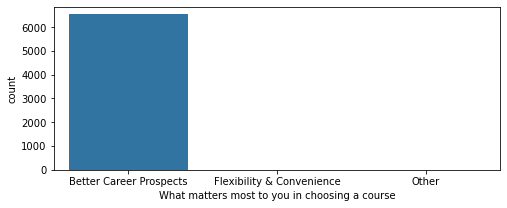

In [22]:
# Checking the column values etc

display(leads['What matters most to you in choosing a course'].value_counts(normalize=True))
print('Percentage of nulls: ', leads['What matters most to you in choosing a course'].isnull().sum()/leads.shape[0])

plt.figure(figsize=(8,3))
sns.countplot(leads['What matters most to you in choosing a course'])
plt.show()

Most of the values are 'Better Career Prospects'. So the data is skewed, Its better option to drop this column

In [23]:
leads.drop(['What matters most to you in choosing a course'], axis='columns', inplace=True)

#### 'Tags, Lead Quality, Lead Profile, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score' columns

Tags,\
Lead Quality,\
Lead Profile, \
Asymmetrique Activity Index, \
Asymmetrique Profile Index, \
Asymmetrique Activity Score, \
Asymmetrique Profile Score



This variables are assigned by Sales team, so using this column for prediction wont be useful as they wont be able when the model will be in production stage.
Its better to drop them

In [24]:
leads.drop(['Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis='columns', inplace=True)

In [25]:
# Checking if above columns got dropped

leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### 'Last Activity, Last Notable Activity' columns

In [26]:
# Checking the two columns' values

print('values in the Last Activity column: ')
display(leads['Last Activity'].value_counts(normalize=True))

print('values in the Last Notable Activity column: ')
display(leads['Last Notable Activity'].value_counts(normalize=True))

values in the Last Activity column: 


Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Marked Spam               0.000219
Email Received                  0.000219
Resubscribed to emails          0.000109
Visited Booth in Tradeshow      0.000109
Name: Last Activity, dtype: float64

values in the Last Notable Activity column: 


Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Email Received                  0.000108
View in browser link Clicked    0.000108
Resubscribed to emails          0.000108
Form Submitted on Website       0.000108
Approached upfront              0.000108
Name: Last Notable Activity, dtype: float64

In [27]:
#As we have both this variables with similar values, so its better to drop one of them. Here we will drop Last Notable Activity.

leads.drop(['Last Notable Activity'], axis='columns', inplace=True)

#### 'Lead Source' column

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Social Media         0.000217
Live Chat            0.000217
Press_Release        0.000217
welearnblog_Home     0.000109
WeLearn              0.000109
testone              0.000109
blog                 0.000109
NC_EDM               0.000109
youtubechannel       0.000109
Pay per Click Ads    0.000109
Name: Lead Source, dtype: float64

Percentage of null values:  0.003896103896103896


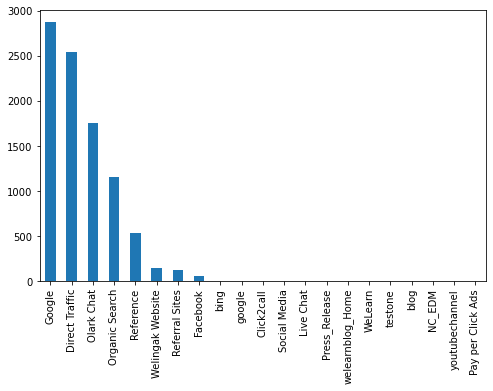

In [28]:
display(leads['Lead Source'].value_counts(normalize=True))
print('Percentage of null values: ', leads['Lead Source'].isnull().sum()/leads.shape[0])

plt.figure(figsize=(8,5))
leads['Lead Source'].value_counts().plot(kind='bar')
plt.show()

Now we can see two variables- Google and google. They are counted as different values in the column because of the small case first letter, so we will replace the value google with Google.\
Also, there are 0.39% nulls in this column, so after the above operation, we will drop the nulls.

In [29]:
leads['Lead Source'].replace({'google':'Google'}, inplace=True)

# Checking what values are present in the column after replacement
leads['Lead Source'].unique()

#google has been replaced by Google as we can see from below

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'Facebook', nan,
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [30]:
#There are many values with a very low count so we will club all the values with less than 4% count
#together into a single variable

leads['Lead Source'] = leads['Lead Source'].replace(['Referral Sites', 'Welingak Website', 'google',
       'Facebook','blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], 'Other Lead Source')

leads['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Other Lead Source     345
Name: Lead Source, dtype: int64

In [31]:
# Dropping nulls

leads.dropna(subset=['Lead Source'], inplace=True)

# Checking nulls again
leads['Lead Source'].isnull().sum()

0

#### 'I agree to pay the amount through cheque' column

In [32]:
print('Percentage of values: ', leads['I agree to pay the amount through cheque'].value_counts(normalize=True))

Percentage of values:  0    1.0
Name: I agree to pay the amount through cheque, dtype: float64


In [33]:
# All the values are No
# Since the data is skewed, we will drop this column too

leads.drop(['I agree to pay the amount through cheque'], axis='columns', inplace=True)

#### 'A free copy of Mastering The Interview' column

In [34]:
# Checking ratio of values in column, and nulls

display(leads['A free copy of Mastering The Interview'].value_counts())
print('Percentage of nulls: ', leads['A free copy of Mastering The Interview'].isnull().sum()/leads.shape[0])

0    6316
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

Percentage of nulls:  0.0


Since nulls are 0 and values are not skewd, no need to do anything on this column.

#### 'City' column

Mumbai                         0.578512
Thane & Outskirts              0.134926
Other Cities                   0.123248
Other Cities of Maharashtra    0.081926
Other Metro Cities             0.068092
Tier II Cities                 0.013295
Name: City, dtype: float64

Percentage of nulls:  0.39526292916123423


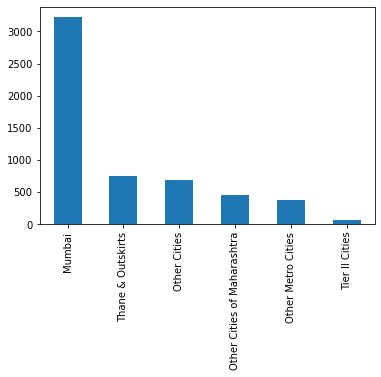

In [35]:
# Checking ratio of values and percentage of nulls in column

display(leads['City'].value_counts(normalize=True))
leads['City'].value_counts().plot(kind='bar')

print('Percentage of nulls: ', leads['City'].isnull().sum()/leads.shape[0])

In [36]:
#Forward filling the null values

leads['City'].fillna(method='ffill', inplace=True)

# Checking the values ratio and null percentage again

display(leads['City'].value_counts(normalize=True))

print('Percentage of nulls: ', leads['City'].isnull().sum()/leads.shape[0])

Mumbai                         0.579113
Thane & Outskirts              0.132145
Other Cities                   0.128342
Other Cities of Maharashtra    0.082591
Other Metro Cities             0.066290
Tier II Cities                 0.011519
Name: City, dtype: float64

Percentage of nulls:  0.000217296827466319


The values that are still null are so because even the value ahead of them was null, so null got imputed with null. We will do a backward fill to fill them up.

In [37]:
#Forward filling the null values

leads['City'].fillna(method='bfill', inplace=True)

# Checking the values ratio and null percentage again

display(leads['City'].value_counts(normalize=True))

print('Percentage of nulls: ', leads['City'].isnull().sum()/leads.shape[0])

Mumbai                         0.579205
Thane & Outskirts              0.132116
Other Cities                   0.128314
Other Cities of Maharashtra    0.082573
Other Metro Cities             0.066276
Tier II Cities                 0.011517
Name: City, dtype: float64

Percentage of nulls:  0.0


Now, all the nulls have been imputed. Checking the plot once again.

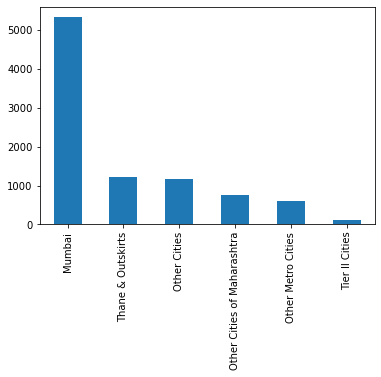

In [38]:
leads['City'].value_counts().plot(kind='bar')

So the overall ratio of all the values has remained almost the same.

#### 'TotalVisits' column

In [39]:
# Checking the null percentage

print('Percentage of nulls: ', leads['TotalVisits'].isnull().sum()/leads.shape[0])

Percentage of nulls:  0.014124293785310734


In [40]:
#Since the null values are very less, we will drop such rows

leads.dropna(subset=['TotalVisits'], inplace=True)
print('Percentage of nulls:\n', leads[['TotalVisits','Page Views Per Visit']].isnull().sum()/leads.shape[0])

Percentage of nulls:
 TotalVisits             0.0
Page Views Per Visit    0.0
dtype: float64


The nulls in TotalVisits column have become 0.

In [41]:
# Checking the nulls in the dataset once again now

display(leads.isna().sum()/leads.shape[0]*100)
display(leads['TotalVisits'].isnull().sum())

print('Total remaining null values in the dataset: ', leads.isnull().sum().sum())

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
Occupation                                0.0
Search                                    0.0
Magazine                                  0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Receive More Updates About Our Courses    0.0
Update me on Supply Chain Content         0.0
Get updates on DM Content         

0

Total remaining null values in the dataset:  0


In [42]:
# Checking value counts of categories in different columns of dataset to see if there are any more skewed columns.

for i in leads.columns:
    print('\n\nValue counts of column: ', i, '\n', leads[i].value_counts(normalize=True))



Value counts of column:  Lead Number 
 608255    0.00011
656682    0.00011
634167    0.00011
625971    0.00011
646449    0.00011
           ...   
582137    0.00011
643807    0.00011
600800    0.00011
598753    0.00011
655360    0.00011
Name: Lead Number, Length: 9074, dtype: float64


Value counts of column:  Lead Origin 
 Landing Page Submission    0.538351
API                        0.394313
Lead Add Form              0.064029
Lead Import                0.003306
Name: Lead Origin, dtype: float64


Value counts of column:  Lead Source 
 Google               0.316619
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Other Lead Source    0.033943
Name: Lead Source, dtype: float64


Value counts of column:  Do Not Email 
 0    0.921093
1    0.078907
Name: Do Not Email, dtype: float64


Value counts of column:  Do Not Call 
 0    0.99978
1    0.00022
Name: Do Not Call, dtype: float64


Value counts of column:  Conver

As we can see, there are still many columns which are skewed, so we will drop them. The columns to be dropped because of skewness now are-

1. Search
2. Magazine
3. Newspaper Article
4. X Education Forums
5. Newspaper 
6. Digital Advertisement
7. Through Recommendations
8. Receive More Updates About Our Courses
9. Update me on Supply Chain Content
10. Get updates on DM Content

Another task that is pending is the clubbing of various categories with weight less that 4% in the Last Activity column. We will do that after the dropping of above columns.

In [43]:
leads.drop(['Search', 
            'Magazine', 
            'Newspaper Article', 
            'X Education Forums', 
            'Newspaper', 
            'Digital Advertisement', 
            'Through Recommendations', 
            'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 
            'Get updates on DM Content'], axis='columns', inplace=True)

# Checking the columns in leads after the drop
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [44]:
leads['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [45]:
# Combining all values less than 4% in Last Activity into a new category called Other Last Activity

leads['Last Activity'] = leads['Last Activity'].replace(['Email Bounced', 
                                                     'Email Link Clicked', 
                                                     'Form Submitted on Website', 
                                                     'Unreachable', 
                                                     'Unsubscribed', 
                                                     'Had a Phone Conversation', 
                                                     'View in browser link Clicked', 
                                                     'Approached upfront', 
                                                     'Email Marked Spam', 
                                                     'Email Received', 
                                                     'Visited Booth in Tradeshow', 
                                                     'Resubscribed to emails'], 'Other Last Activity')

# Checking the values in Last Activity once again

leads['Last Activity'].value_counts()

Email Opened               3432
SMS Sent                   2716
Olark Chat Conversation     972
Other Last Activity         886
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

So now that all nulls have been taken care of, data is fully clean, all irrelevant rows are dropped etc, we will move forward with performing EDA on the data, and removal of outliers.

#### Percentage of rows retained

Originally number of rows was 9240.

In [46]:
# Percentage of rows retained 
(len(leads.index)/9240)*100

98.2034632034632

Thus we have retained 98.2% rows from the original.

## Outlier handling

There are only three continuous numerical column in our dataset, rest all are categorical. Thus, we need to check for ouliers only in the three columns- 'TotalVisits','Total Time Spent on Website','Page Views Per Visit'

In [47]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Other Last Activity,Media and Advertising,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Mumbai,0


Converted
0    18786.0
1    12574.0
Name: TotalVisits, dtype: float64

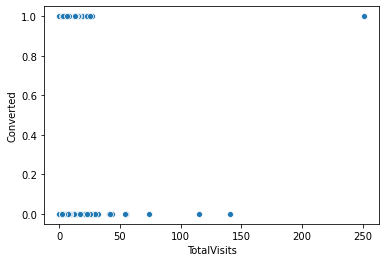

In [48]:
# TotalVisits column

sns.scatterplot(x='TotalVisits', y='Converted', data=leads)

display(leads.groupby('Converted')['TotalVisits'].sum())

There is one outlier in the Converted=1 group which pulls the mean of the group upwards.

In [49]:
# Checking for outliers

leads[['TotalVisits','Total Time Spent on Website',
         'Page Views Per Visit']].describe(percentiles=[0.9,0.95,0.07,0.99,0.995])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
7%,0.000000,0.000000,0.000000
50%,3.000000,246.000000,2.000000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000
99.5%,21.000000,1929.445000,11.000000


There are some outliers in the upper range all the four columns, so we will cap the outliers at 99% values.

In [50]:
# Capping the upper percentiles to the 99% percentile value

leads['TotalVisits'].clip(upper=leads['TotalVisits'].quantile(0.99), inplace=True)
leads['Total Time Spent on Website'].clip(upper=leads['Total Time Spent on Website'].quantile(0.99), inplace=True)
leads['Page Views Per Visit'].clip(upper=leads['Page Views Per Visit'].quantile(0.99), inplace=True)

In [51]:
# Checking if capping is done properly

leads[['TotalVisits','Total Time Spent on Website',
           'Page Views Per Visit']].describe(percentiles=[0.9,0.95,0.07,0.99,0.995])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.343178,481.759643,2.341241
std,3.252302,542.222943,1.984635
min,0.000000,0.000000,0.000000
7%,0.000000,0.000000,0.000000
50%,3.000000,246.000000,2.000000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000
99.5%,17.000000,1839.000000,9.000000


So capping is done, as we can see all the values after 99 percentile are the same.

## Exploratory Data Analysis

Converted
0    1856621
1    2514866
Name: Total Time Spent on Website, dtype: int64

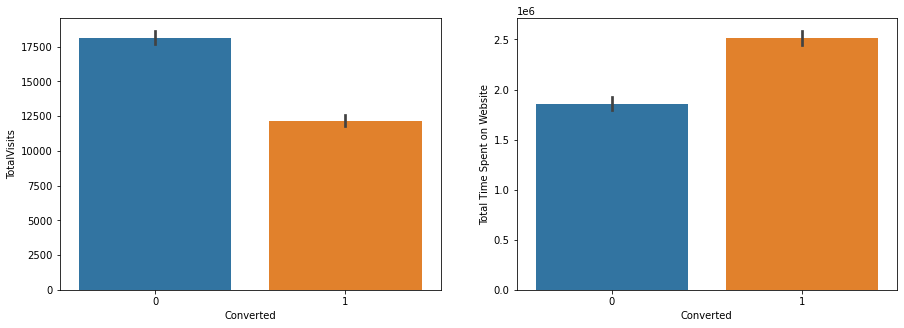

In [52]:
# Checking the distribution on Total time spent on website for those who converted and those who didn't

f,ax = plt.subplots(1,2, figsize=(15,5))

sns.barplot(y='TotalVisits', x='Converted', data=leads, estimator=sum, ax=ax[0])

sns.barplot(y='Total Time Spent on Website', x='Converted', estimator=sum, data=leads, ax=ax[1])

display(leads.groupby('Converted')['Total Time Spent on Website'].sum())

We can see that the number of people who got converted actually have less total number of visits to the website than the people who didn't. This could be because the site is getting more hits, but most of them do not convert.

Total Time Spent on Website is more for people who converted.

#### Inference: Maybe the X Education company has some details on their website that are turning people away from purchasing their courses. They also need to make their website more engaging.

In [53]:
# Creating a copy of the dataset and then a new column in the dataset- Avg time spent per visit

leadsCopy = leads.copy()

leadsCopy['Avg Time Spent per visit'] = (leadsCopy['Total Time Spent on Website'] / leadsCopy['TotalVisits'])
leadsCopy.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,City,A free copy of Mastering The Interview,Avg Time Spent per visit
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Mumbai,0,NaN
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other,Unemployed,Mumbai,0,134.8


In [54]:
# Checking for nulls in the new column

leadsCopy['Avg Time Spent per visit'].isnull().sum()

2161

There nulls are made wherever both the TotalVisits and Total Time Spent on Website are both 0. We will replace all of them by 0.

In [55]:
#Replacing all the nulls in the new column by 0
print('Old nulls= ', leadsCopy['Avg Time Spent per visit'].isnull().sum())

leadsCopy['Avg Time Spent per visit'].fillna(0, inplace=True)

print('New nulls= ', leadsCopy['Avg Time Spent per visit'].isnull().sum())

Old nulls=  2161
New nulls=  0


Converted
0    657584.842529
1    738964.455396
Name: Avg Time Spent per visit, dtype: float64

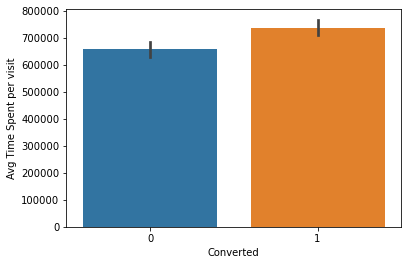

In [56]:
# Plotting average time spent per visit

sns.barplot(y='Avg Time Spent per visit', x='Converted',estimator=sum, data=leadsCopy)

display(leadsCopy.groupby('Converted')['Avg Time Spent per visit'].sum())

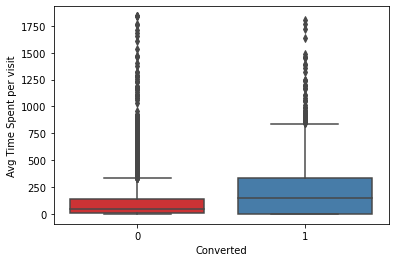

In [57]:
sns.boxplot(y = 'Avg Time Spent per visit', x = 'Converted', data = leadsCopy,palette='Set1')

In [58]:
percentiles = leadsCopy['Avg Time Spent per visit'].quantile([0.00,0.95]).values
leadsCopy['Avg Time Spent per visit'][leadsCopy['Avg Time Spent per visit'] <= percentiles[0]] = percentiles[0]
leadsCopy['Avg Time Spent per visit'][leadsCopy['Avg Time Spent per visit'] >= percentiles[1]] = percentiles[1]


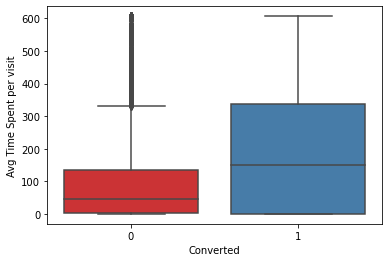

In [59]:
sns.boxplot(y = 'Avg Time Spent per visit', x = 'Converted', data = leadsCopy,palette='Set1')

Even though the total number of visits to the website of the people who converted are less than those who didn't, the time converted people have spent is much higher than them.

#### Inference: As we can see there are lots of outliers for people who didnt converted, which implies that Avg time spent should be carefully considered because it can lead to lot of false positive information. There still isn't a significant enough difference in the average time spent on website between those who converted and those who didn't, Although the median of the leads which are converted have higher average time spent on website.

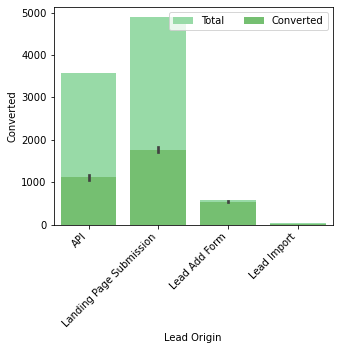

In [60]:
# Lead Origin column wrt to Converted

# Checking the metrics of Lead Source column wrt to Converted

f, ax = plt.subplots(figsize=(5, 4))

sns.set_color_codes("pastel")
sns.countplot(leads['Lead Origin'], label="Total", color="g")

sns.set_color_codes("muted")
sns.barplot(x='Lead Origin', y='Converted', estimator=sum, data=leads, label="Converted", color="g")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='medium')
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel='Lead Origin')

plt.show()

We can see that almost all the people approached using Lead Add Form got converted. The Landing Page Submission has the most drop from number of people approached to those who actually converted.

Let's look at the percentage of conversion for Lead Origin column.

Lead Origin
API                        31.162661
Landing Page Submission    36.171955
Lead Add Form              93.631670
Lead Import                30.000000
Name: Converted, dtype: float64

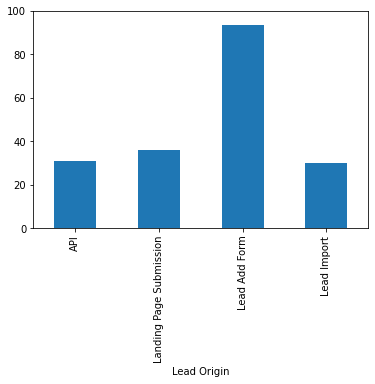

In [61]:
# Checking the percentage conversion rate for each category in Lead Origin

LeadOrigin_Percent = (leads.groupby(['Lead Origin'])['Converted'].sum())/(leads.groupby(['Lead Origin'])['Converted'].count())*100
LeadOrigin_Percent.plot(kind='bar').set(ylim=(0,100))
display(LeadOrigin_Percent)

As already seen from above, Lead Add Form has the highest percentage of success, with the rest of the three catogories faring almost the same at around 30% each.

#### Inference: Get more leads using the Lead Add Form. Also, increase the conversion rate of leads by other origins like Landing Page Submission.

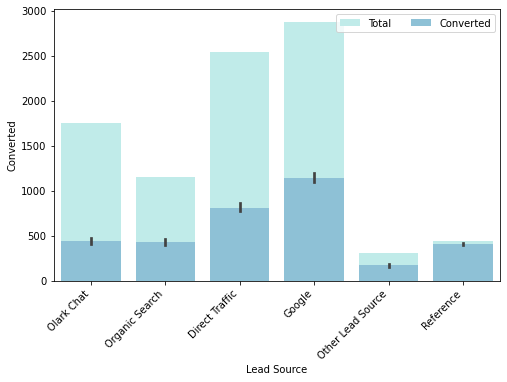

In [62]:
# Checking the metrics of Lead Source column wrt to Converted

f, ax = plt.subplots(figsize=(8, 5))

sns.set_color_codes("pastel")
sns.countplot(leads['Lead Source'], label="Total", color="c")

sns.set_color_codes("muted")
sns.barplot(x='Lead Source', y='Converted', estimator=sum, data=leads, label="Converted", color="c")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='medium')
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel="Lead Source")

plt.show()

We can see that most of the converted leads come through Google, followed by Direct Traffic leads. The Olark Chat leads, Organic Search leads and Reference leads are all almost equal contributors to conversion.

Also, let's check the percentage of conversion for each category in Lead Source to get a sense of their success percent.

Lead Source
Direct Traffic       32.166732
Google               39.923425
Olark Chat           25.556189
Organic Search       37.781629
Other Lead Source    57.142857
Reference            92.550790
Name: Converted, dtype: float64

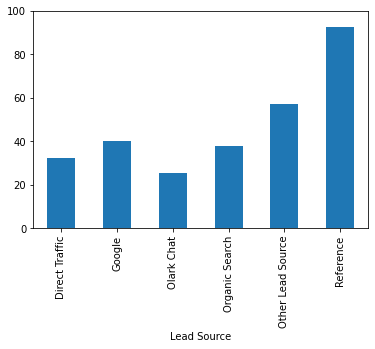

In [63]:
# Checking the percentage conversion rate for each category in Lead Source

LeadSource_Percent = (leads.groupby(['Lead Source'])['Converted'].sum())/(leads.groupby(['Lead Source'])['Converted'].count())*100
LeadSource_Percent.plot(kind='bar').set(ylim=(0,100))
display(LeadSource_Percent)

Surprisingly, we see that even though Reference was contributing to small numbers of conversions, the percentage of leads converted are highest for them.

#### Inference: Focus more on getting leads from reference sources. Increase lead conversion rate by the Google and Direct Traffic sources.

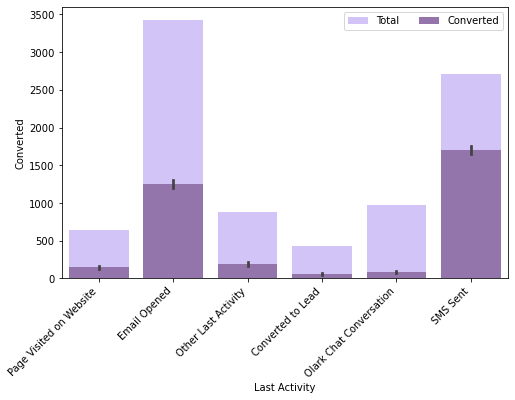

In [64]:
# Checking the metrics of Last Activity column wrt to Converted

f, ax = plt.subplots(figsize=(8, 5))

sns.set_color_codes("pastel")
sns.countplot(leads['Last Activity'], label="Total", color="m")

sns.set_color_codes("muted")
sns.barplot(x='Last Activity', y='Converted', estimator=sum, data=leads, label="Converted", color="m")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='medium')
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel="Last Activity")

plt.show()

We can see that the conversion rate is highest when the last activity of the customer is 'SMS Sent'. Let's also calculate the percentage success for each category.

Last Activity
Converted to Lead          12.616822
Email Opened               36.421911
Olark Chat Conversation     8.641975
Other Last Activity        21.557562
Page Visited on Website    23.593750
SMS Sent                   62.776141
Name: Converted, dtype: float64

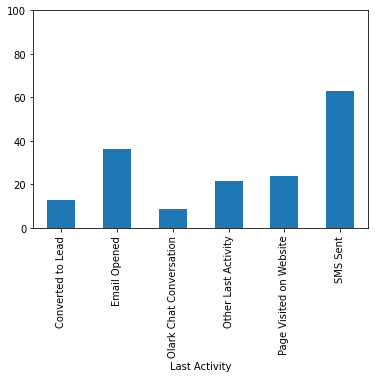

In [65]:
# Checking the percentage conversion rate for each category in Lead Source

LastActivity_Percent = (leads.groupby(['Last Activity'])['Converted'].sum())/(leads.groupby(['Last Activity'])['Converted'].count())*100
LastActivity_Percent.plot(kind='bar').set(ylim=(0,100))
display(LastActivity_Percent)

Our statement of above has been reinforced, conversion rate is highest when lead's last activity is SMS Sent. Email opened comes in second.

#### Inference: The last activity with the highest conversion rate is 'SMS Sent'. This suggests that X Education need to step up their social media marketing skills, because SMS's have become quite old, and if their highest conversions are coming from an old technology, it isn't good.

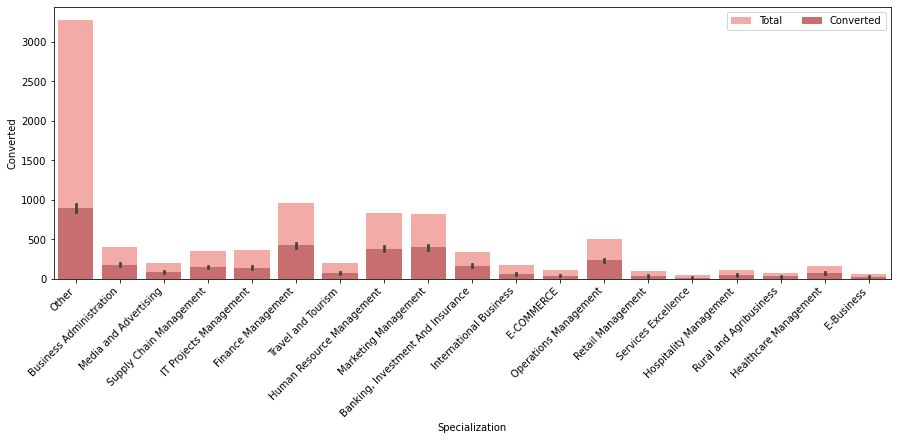

In [66]:
# Checking the metrics of Last Activity column wrt to Converted

f, ax = plt.subplots(figsize=(15, 5))

sns.set_color_codes("pastel")
sns.countplot(leads['Specialization'], label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x='Specialization', y='Converted', estimator=sum, data=leads, label="Converted", color="r")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='medium')
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel="Specialization")

plt.show()

From the above graph we can see that conversion rate is high for some specializations like Rural and Agribusiness, Healthcare Management, Media and Advertising. Let's check the conversion percentage for each category numerically.

Specialization
Banking, Investment And Insurance    48.955224
Business Administration              43.859649
E-Business                           36.842105
E-COMMERCE                           35.135135
Finance Management                   44.004171
Healthcare Management                48.717949
Hospitality Management               40.540541
Human Resource Management            45.400239
IT Projects Management               38.251366
International Business               35.227273
Marketing Management                 48.238153
Media and Advertising                41.584158
Operations Management                46.893788
Other                                27.452773
Retail Management                    34.000000
Rural and Agribusiness               42.465753
Services Excellence                  27.500000
Supply Chain Management              42.774566
Travel and Tourism                   35.148515
Name: Converted, dtype: float64

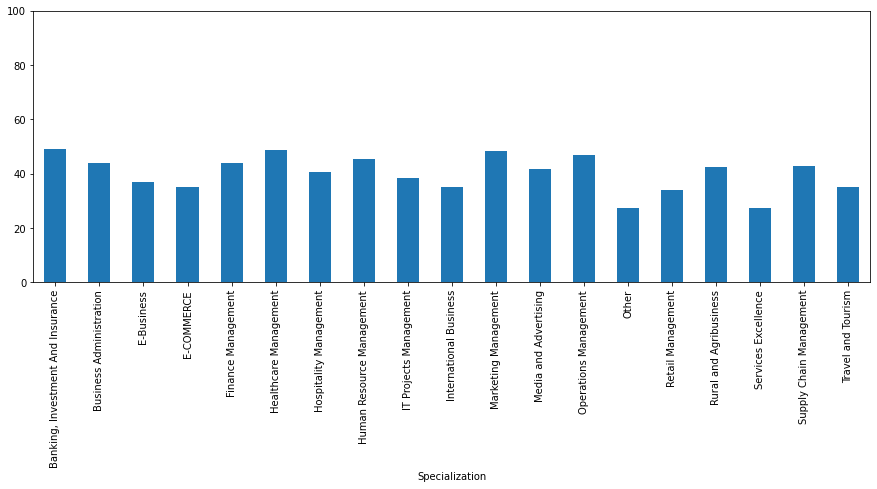

In [67]:
# Checking the percentage conversion rate for each category in Specialization

Specialization_Percent = (leads.groupby(['Specialization'])['Converted'].sum())/(leads.groupby(['Specialization'])['Converted'].count())*100
plt.figure(figsize=(15,5))
Specialization_Percent.plot(kind='bar').set(ylim=(0,100))
display(Specialization_Percent)

As we can see, all the specialization have roughly the same percentage of people who converted- around 50% for each category.

#### Inference: We need to focus on converting more leads in all specializations since all are equally distributed.

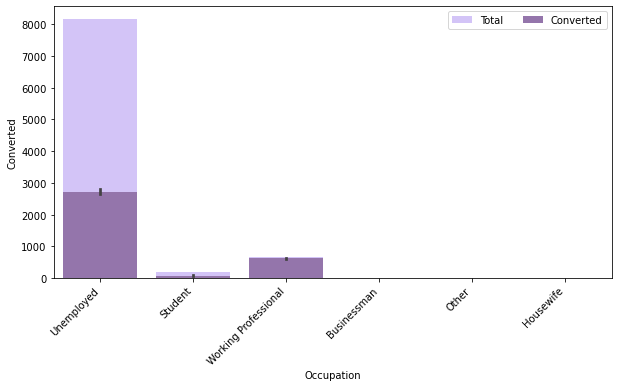

In [68]:
# Checking the metrics of Occupation column wrt to Converted

f, ax = plt.subplots(figsize=(10, 5))

sns.set_color_codes("pastel")
sns.countplot(leads['Occupation'], label="Total", color="m")

sns.set_color_codes("muted")
sns.barplot(x='Occupation', y='Converted', estimator=sum, data=leads, label="Converted", color="m")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='medium')
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel="Occupation")

plt.show()

The maximum people purchasing coursees of X Education are Unemployed. Other occupations like Housewife and Student are almost negligible in comparision. We can also see that though Working Professional getting converted are few, the conversion rate for them is almost 100%. Let's check conversion rates for all the categories:

Occupation
Businessman              62.500000
Housewife               100.000000
Other                    60.000000
Student                  35.922330
Unemployed               33.288393
Working Professional     91.875923
Name: Converted, dtype: float64

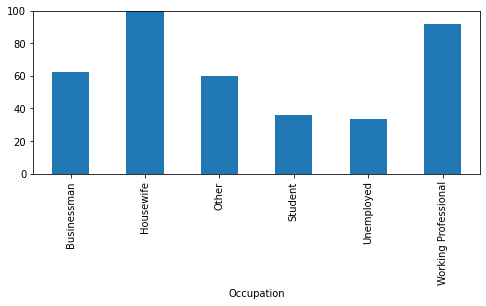

In [69]:
# Checking the percentage conversion rate for each category in Occupation

Occupation_Percent = (leads.groupby(['Occupation'])['Converted'].sum())/(leads.groupby(['Occupation'])['Converted'].count())*100
plt.figure(figsize=(8,3))
Occupation_Percent.plot(kind='bar').set(ylim=(0,100))
display(Occupation_Percent)

As we can see, even though the maxinum people getting converted are Unemployed, their conversion rate is just 33%. Housewife on the other hand have 100% conversion rate, and Working Professionals also have a very high conversion rate at almost 92%.

#### Inference: X Education needs to reach out to more Housewives and Working Professionals. They also need to offer some kind of placement services that will benefit the Unemployed group, so their rate of conversion can be improved.

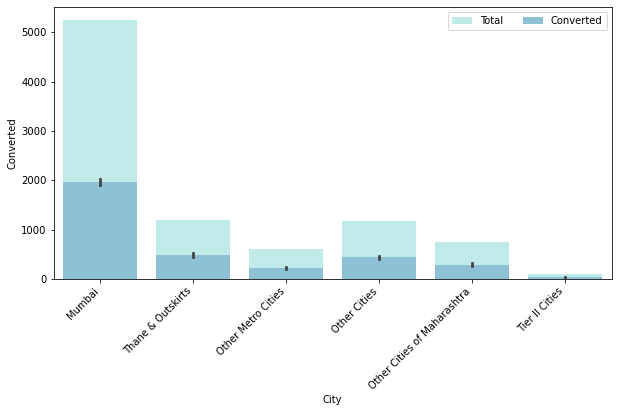

In [70]:
# Checking the metrics of Occupation column wrt to City

f, ax = plt.subplots(figsize=(10, 5))

sns.set_color_codes("pastel")
sns.countplot(leads['City'], label="Total", color="c")

sns.set_color_codes("muted")
sns.barplot(x='City', y='Converted', estimator=sum, data=leads, label="Converted", color="c")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='medium')
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel="City")

plt.show()

We can see that the maximum leads are being generated from Mumbai City. Other cities are not being approached so much. Let's check the percent conversion for each category to get a clearer picture:

City
Mumbai                         37.461890
Other Cities                   37.596567
Other Cities of Maharashtra    38.471850
Other Metro Cities             36.677632
Thane & Outskirts              40.383014
Tier II Cities                 33.962264
Name: Converted, dtype: float64

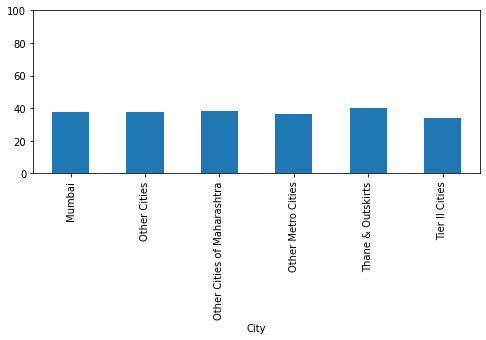

In [71]:
# Checking the percentage conversion rate for each category in City

City_Percent = (leads.groupby(['City'])['Converted'].sum())/(leads.groupby(['City'])['Converted'].count())*100
plt.figure(figsize=(8,3))
City_Percent.plot(kind='bar').set(ylim=(0,100))
display(City_Percent)

We can see that even though maximum leads are from Mumbai City, the conversion rate of all cities is approx the same- 38%. 

#### Inference: Conversion Rate for other cities might increase if X Education reaches out to more leads from them.

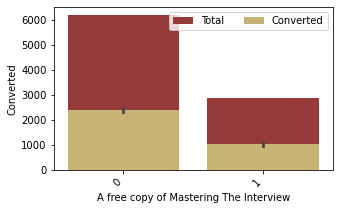

In [72]:
# Checking the metrics of Occupation column wrt to City

f, ax = plt.subplots(figsize=(5, 3))

sns.set_color_codes("pastel")
sns.countplot(leads['A free copy of Mastering The Interview'], label="Total", color="brown")

sns.set_color_codes("muted")
sns.barplot(x='A free copy of Mastering The Interview', y='Converted', estimator=sum, data=leads, label="Converted", color="y")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='medium')
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel="A free copy of Mastering The Interview")

plt.show()

Most of the converted people seem to be not opting for the free copy, suggesting that its contents are of no use to them.

A free copy of Mastering The Interview
0    38.878112
1    35.664820
Name: Converted, dtype: float64

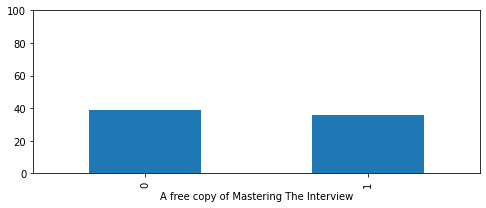

In [73]:
# Checking the percentage conversion rate for each category in A free copy of Mastering The Interview

Book_Percent = (leads.groupby(['A free copy of Mastering The Interview'])['Converted'].sum())/(leads.groupby(['A free copy of Mastering The Interview'])['Converted'].count())*100
plt.figure(figsize=(8,3))
Book_Percent.plot(kind='bar').set(ylim=(0,100))
display(Book_Percent)

The percentage of conversion for both those wanting the free copy and those not wanting it are almost the same- around 36%. This suggests that the book is not very instrumental in influencing the decision of leads, and maybe some other freebie needs to be offered.

#### Inference: Offer some other more attractive freebie.

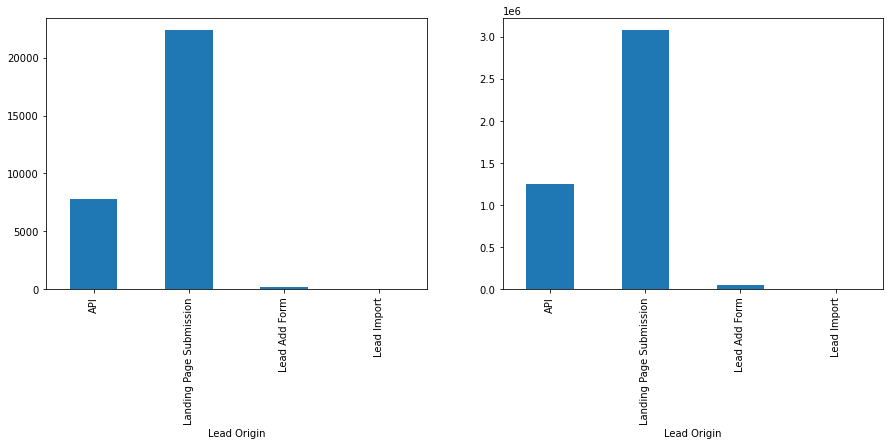

In [74]:
# Checking what category of Lead Origin has how many visits and time spent on the website

f,ax = plt.subplots(1,2, figsize=(15,5))
leads.groupby(['Lead Origin'])['TotalVisits'].sum().plot(kind='bar', ax=ax[0])
leads.groupby(['Lead Origin'])['Total Time Spent on Website'].sum().plot(kind='bar', ax=ax[1])
plt.show()

We can see that leads with 'Landing Page Submission' lead source have highest visits. We had also seen earlier that converters have more totalvisits on the website, and Lead Add Form had the higest conversion rate. 

#### Inference: The company needs to increase visits on its website by the Lead Add Form lead source.

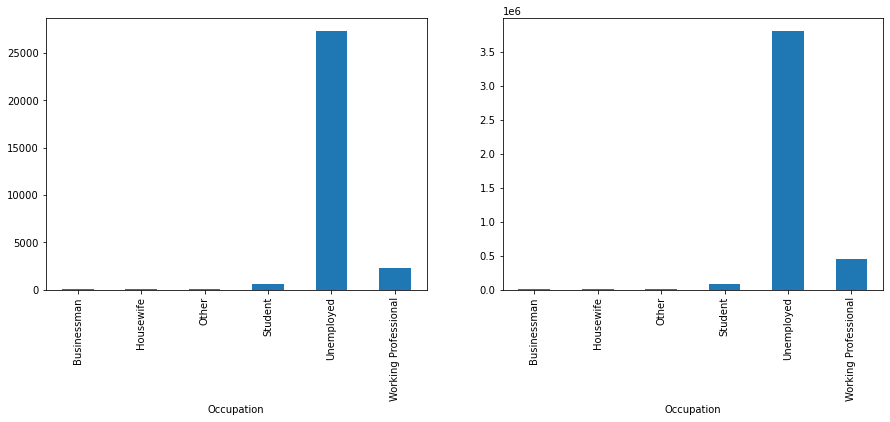

In [75]:
# Checking what category of Occupation has how many visits and time spent on the website

f,ax = plt.subplots(1,2, figsize=(15,5))

leads.groupby(['Occupation'])['TotalVisits'].sum().plot(kind='bar', ax=ax[0])#.set(ylim=(0,3500000))

leads.groupby(['Occupation'])['Total Time Spent on Website'].sum().plot(kind='bar', ax=ax[1])

plt.show()

Company has most total visits and most time spent on the website by Unemployed people, and the ratio of both variables is almost the same across categories in Unemployed.

The columns we dropped had some asking leads where they had heard of X Education, and they were all skewed highly towards No.

#### Inference: Company can work to increase it's reach to other categories of occupation by advertising in more such spaces where other occupations are more likely to see or hear about it.

### Creating Dummy Variables

In [76]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Other Last Activity,Media and Advertising,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Mumbai,0


In [77]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [78]:
#Creating dummy variables for categorical columns

dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'Occupation', 'City']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Source,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [79]:
dummy.shape

(9074, 41)

As we can see now we have 41 columns

In [80]:
leads1 = pd.concat([leads, dummy], axis=1)
leads1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Source,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Mumbai,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other,Unemployed,Mumbai,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Other Last Activity,Media and Advertising,Unemployed,Mumbai,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Mumbai,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [81]:
leads1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Occupation', 'City',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other Lead Source', 'Lead Source_Reference',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Last Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
      

In [82]:
#Dropping original columns

leads1.drop(['Lead Origin', 'Lead Source','Last Activity','Specialization','Occupation','City'], axis='columns', inplace=True)
leads1.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Source,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Train-Test Splitting of  Data

In [83]:
#Importing libraries
from sklearn.model_selection import train_test_split

In [84]:
# Putting feature variable to X
X = leads1.drop(['Lead Number','Converted'], axis=1)

In [85]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Source,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [86]:
# Putting response variable to y
y = leads1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [87]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature-Scaling

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Source,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,0,0,-0.417238,-0.159145,-0.177298,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1012,1,0,-0.417238,-0.540914,-0.177298,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9226,0,0,-1.034493,-0.891330,-1.183128,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4750,0,0,-0.417238,1.653796,-0.177298,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
7987,0,0,0.508645,2.030032,0.074159,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [89]:
# Checking the Conversion Rate
Converted = (sum(leads1['Converted'])/len(leads1['Converted'].index))*100
Converted

37.85541106458012

We have almost 38% conversion rate on our original data

### Logistic Model Building

In [90]:
#Importing Libraries

import statsmodels.api as sm

In [91]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.1
Date:                Mon, 07 Sep 2020   Deviance:                       5244.1
Time:                        20:17:55   Pearson chi2:                 6.86e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4364      1.096     -0.398      0.691      -2.585       1.712
Do Not Email                                -1.5211      0.180     -8.446      0.000      -1.874      -1.168
Do Not Call                                 21.3859   3.08e+04      0.001      0.999   -6.03e+04    6.04e+04
TotalVisits                                  0.2782      0.050      5.520      0.000       0.179       0.377
Total Time Spent on Website                  1.1166      0.041     27.391      0.000       1.037       1.196
Page Views Per Visit                        -0.2550      0.057     -4.477      0.000      -0.367      -0.143
A free copy of Mastering The Interview      -0.1918      0.109     -1.766      0.077      -0.405       0.021
Lead Origin_Landing Page Submission         -0.8924      0.136     -6.577      0.000      -1.158      -0.626
Lead Origin_Lead Add Form                    5.1453      0.606      8.497      0.000       3.958       6.332
Lead Origin_Lead Import                      0.8512      0.571      1.489      0.136      -0.269       1.971
Lead Source_Google                           0.2071      0.114      1.818      0.069      -0.016       0.430
Lead Source_Olark Chat                       1.2919      0.164      7.854      0.000       0.970       1.614
Lead Source_Organic Search                   0.1419      0.131      1.080      0.280      -0.116       0.399
Lead Source_Other Lead Source                0.1494      0.311      0.480      0.631      -0.461       0.759
Lead Source_Reference                       -1.6925      0.647     -2.617      0.009      -2.960      -0.425
Last Activity_Email Opened                   1.2295      0.227      5.423      0.000       0.785       1.674
Last Activity_Olark Chat Conversation       -0.3246      0.274     -1.183      0.237      -0.863       0.213
Last Activity_Other Last Activity            1.0977      0.255      4.303      0.000       0.598       1.598
Last Activity_Page Visited on Website        0.6392      0.267      2.398      0.016       0.117       1.162
Last Activity_SMS Sent                       2.4916      0.228     10.910      0.000       2.044       2.939
Specialization_Business Administration      -0.3018      0.241     -1.251      0.211      -0.775       0.171
Specialization_E-Business                    0.2338      0.451      0.519      0.604      -0.649       1.117
Specialization_E-COMMERCE                    0.0199      0.359      0.056      0.956      -0.684       0.724
Specialization_Finance Management           -0.1628      0.203     -0.804      0.422      -0.560       0.234
Specialization_Healthcare Management        -0.2320      0.315     -0.736      0.462      -0.850       0.386
Specialization_Hospitality Mana

In [92]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#Using RFE to get top 20 important variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [93]:
rfe.support_

array([ True,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False])

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('A free copy of Mastering The Interview', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Other Lead Source', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Last Activity', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 18),
 ('Specialization_E-Business', False, 4),
 ('Specialization_E-COMMERCE', False, 12),
 ('Specialization_Finance Management', False, 23),
 ('Specialization_Healt

In [95]:
#Columns which are included
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Last Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'Specialization_Services Excellence', 'Occupation_Housewife',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional'],
      dtype='object')

In [96]:
#Columns which are excluded after RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other Lead Source',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Occupation_Other',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',


### Assesing the Model with Statsmodel

#### Model 1

In [97]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.8
Date:                Mon, 07 Sep 2020   Deviance:                       5301.7
Time:                        20:17:57   Pearson chi2:                 6.87e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6303      0.658     -0.958      0.338      -1.920       0.659
Do Not Email                             -1.5885      0.177     -8.982      0.000      -1.935      -1.242
Do Not Call                              21.4949   3.23e+04      0.001      0.999   -6.33e+04    6.33e+04
Total Time Spent on Website               1.1135      0.040     27.636      0.000       1.034       1.192
Lead Origin_Landing Page Submission      -1.0987      0.128     -8.578      0.000      -1.350      -0.848
Lead Origin_Lead Add Form                 5.1280      0.529      9.689      0.000       4.091       6.165
Lead Origin_Lead Import                   0.7867      0.484      1.627      0.104      -0.161       1.735
Lead Source_Olark Chat                    1.1217      0.123      9.155      0.000       0.882       1.362
Lead Source_Reference                    -1.8311      0.568     -3.226      0.001      -2.943      -0.719
Last Activity_Email Opened                1.2869      0.223      5.783      0.000       0.851       1.723
Last Activity_Olark Chat Conversation    -0.2329      0.270     -0.862      0.389      -0.763       0.297
Last Activity_Other Last Activity         1.1909      0.251      4.740      0.000       0.698       1.683
Last Activity_Page Visited on Website     0.8670      0.257      3.380      0.001       0.364       1.370
Last Activity_SMS Sent                    2.5191      0.224     11.236      0.000       2.080       2.959
Specialization_Hospitality Management    -0.4705      0.321     -1.465      0.143      -1.100       0.159
Specialization_Other                     -1.1265      0.124     -9.050      0.000      -1.370      -0.883
Specialization_Services Excellence       -0.5638      0.634     -0.890      0.374      -1.806       0.678
Occupation_Housewife                     21.8990   1.52e+04      0.001      0.999   -2.97e+04    2.98e+04
Occupation_Student                       -0.4468      0.655     -0.682      0.495      -1.731       0.838
Occupation_Unemployed                    -0.9216      0.616     -1.495      0.135      -2.129       0.286
Occupation_Working Professional           1.7682      0.643      2.749      0.006       0.507       3.029
=========================================================================================================
"""

We will be removing variables on at a time having higher P values to improve efficiency of the model

In [98]:
#As we can see that Occupation_Housewife has high P value of 0.99 so we remove that variable
col1 = col.drop('Occupation_Housewife')

#### Model 2

In [99]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.0
Date:                Mon, 07 Sep 2020   Deviance:                       5306.0
Time:                        20:17:57   Pearson chi2:                 6.88e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.1472      0.616     -0.239      0.811      -1.354       1.060
Do Not Email                             -1.5905      0.177     -8.988      0.000      -1.937      -1.244
Do Not Call                              19.4968   1.19e+04      0.002      0.999   -2.33e+04    2.33e+04
Total Time Spent on Website               1.1122      0.040     27.626      0.000       1.033       1.191
Lead Origin_Landing Page Submission      -1.0928      0.128     -8.540      0.000      -1.344      -0.842
Lead Origin_Lead Add Form                 5.1289      0.529      9.691      0.000       4.092       6.166
Lead Origin_Lead Import                   0.7875      0.484      1.629      0.103      -0.160       1.735
Lead Source_Olark Chat                    1.1221      0.123      9.158      0.000       0.882       1.362
Lead Source_Reference                    -1.8270      0.568     -3.219      0.001      -2.939      -0.715
Last Activity_Email Opened                1.2885      0.222      5.791      0.000       0.852       1.725
Last Activity_Olark Chat Conversation    -0.2346      0.270     -0.868      0.385      -0.764       0.295
Last Activity_Other Last Activity         1.1891      0.251      4.734      0.000       0.697       1.681
Last Activity_Page Visited on Website     0.8586      0.257      3.347      0.001       0.356       1.361
Last Activity_SMS Sent                    2.5184      0.224     11.236      0.000       2.079       2.958
Specialization_Hospitality Management    -0.4708      0.321     -1.467      0.142      -1.100       0.158
Specialization_Other                     -1.1240      0.124     -9.036      0.000      -1.368      -0.880
Specialization_Services Excellence       -0.5634      0.634     -0.889      0.374      -1.805       0.678
Occupation_Student                       -0.9344      0.611     -1.528      0.126      -2.133       0.264
Occupation_Unemployed                    -1.4085      0.570     -2.473      0.013      -2.525      -0.292
Occupation_Working Professional           1.2807      0.598      2.140      0.032       0.108       2.454
=========================================================================================================
"""

In [100]:
col1 = col1.drop('Do Not Call')

#### Model 3

In [101]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.6
Date:                Mon, 07 Sep 2020   Deviance:                       5307.2
Time:                        20:17:58   Pearson chi2:                 6.90e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.1454      0.616     -0.236      0.813      -1.353       1.062
Do Not Email                             -1.5912      0.177     -8.988      0.000      -1.938      -1.244
Total Time Spent on Website               1.1124      0.040     27.634      0.000       1.033       1.191
Lead Origin_Landing Page Submission      -1.0966      0.128     -8.574      0.000      -1.347      -0.846
Lead Origin_Lead Add Form                 5.1295      0.529      9.692      0.000       4.092       6.167
Lead Origin_Lead Import                   0.7856      0.484      1.624      0.104      -0.162       1.734
Lead Source_Olark Chat                    1.1209      0.123      9.149      0.000       0.881       1.361
Lead Source_Reference                    -1.8107      0.568     -3.190      0.001      -2.923      -0.698
Last Activity_Email Opened                1.2884      0.222      5.791      0.000       0.852       1.724
Last Activity_Olark Chat Conversation    -0.2251      0.270     -0.835      0.404      -0.754       0.304
Last Activity_Other Last Activity         1.1888      0.251      4.732      0.000       0.696       1.681
Last Activity_Page Visited on Website     0.8584      0.257      3.346      0.001       0.356       1.361
Last Activity_SMS Sent                    2.5182      0.224     11.234      0.000       2.079       2.958
Specialization_Hospitality Management    -0.4730      0.321     -1.473      0.141      -1.102       0.157
Specialization_Other                     -1.1288      0.124     -9.078      0.000      -1.373      -0.885
Specialization_Services Excellence       -0.5655      0.634     -0.892      0.372      -1.808       0.677
Occupation_Student                       -0.9332      0.612     -1.526      0.127      -2.132       0.266
Occupation_Unemployed                    -1.4063      0.570     -2.468      0.014      -2.523      -0.290
Occupation_Working Professional           1.2820      0.599      2.141      0.032       0.108       2.456
=========================================================================================================
"""

In [102]:
col1 = col1.drop('Last Activity_Olark Chat Conversation')

#### Model 4

In [103]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.9
Date:                Mon, 07 Sep 2020   Deviance:                       5307.9
Time:                        20:17:58   Pearson chi2:                 6.90e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3002      0.589     -0.510      0.610      -1.454       0.854
Do Not Email                             -1.5928      0.177     -8.998      0.000      -1.940      -1.246
Total Time Spent on Website               1.1128      0.040     27.620      0.000       1.034       1.192
Lead Origin_Landing Page Submission      -1.0931      0.128     -8.550      0.000      -1.344      -0.843
Lead Origin_Lead Add Form                 5.1259      0.529      9.690      0.000       4.089       6.163
Lead Origin_Lead Import                   0.7853      0.484      1.624      0.104      -0.163       1.733
Lead Source_Olark Chat                    1.1072      0.121      9.124      0.000       0.869       1.345
Lead Source_Reference                    -1.8081      0.567     -3.187      0.001      -2.920      -0.696
Last Activity_Email Opened                1.4375      0.137     10.466      0.000       1.168       1.707
Last Activity_Other Last Activity         1.3382      0.180      7.438      0.000       0.986       1.691
Last Activity_Page Visited on Website     1.0053      0.190      5.289      0.000       0.633       1.378
Last Activity_SMS Sent                    2.6667      0.141     18.905      0.000       2.390       2.943
Specialization_Hospitality Management    -0.4714      0.321     -1.468      0.142      -1.101       0.158
Specialization_Other                     -1.1278      0.124     -9.072      0.000      -1.371      -0.884
Specialization_Services Excellence       -0.5714      0.633     -0.903      0.367      -1.812       0.669
Occupation_Student                       -0.9303      0.612     -1.520      0.128      -2.130       0.269
Occupation_Unemployed                    -1.4004      0.570     -2.457      0.014      -2.518      -0.283
Occupation_Working Professional           1.2951      0.599      2.162      0.031       0.121       2.469
=========================================================================================================
"""

In [104]:
col1 = col1.drop('Specialization_Services Excellence')

#### Model 5

In [105]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.4
Date:                Mon, 07 Sep 2020   Deviance:                       5308.7
Time:                        20:17:58   Pearson chi2:                 6.90e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3019      0.589     -0.513      0.608      -1.455       0.852
Do Not Email                             -1.5983      0.177     -9.029      0.000      -1.945      -1.251
Total Time Spent on Website               1.1130      0.040     27.627      0.000       1.034       1.192
Lead Origin_Landing Page Submission      -1.0922      0.128     -8.546      0.000      -1.343      -0.842
Lead Origin_Lead Add Form                 5.1269      0.529      9.691      0.000       4.090       6.164
Lead Origin_Lead Import                   0.7868      0.484      1.627      0.104      -0.161       1.734
Lead Source_Olark Chat                    1.1069      0.121      9.122      0.000       0.869       1.345
Lead Source_Reference                    -1.8110      0.567     -3.192      0.001      -2.923      -0.699
Last Activity_Email Opened                1.4389      0.137     10.477      0.000       1.170       1.708
Last Activity_Other Last Activity         1.3366      0.180      7.427      0.000       0.984       1.689
Last Activity_Page Visited on Website     1.0068      0.190      5.298      0.000       0.634       1.379
Last Activity_SMS Sent                    2.6664      0.141     18.905      0.000       2.390       2.943
Specialization_Hospitality Management    -0.4680      0.321     -1.457      0.145      -1.097       0.161
Specialization_Other                     -1.1242      0.124     -9.049      0.000      -1.368      -0.881
Occupation_Student                       -0.9309      0.612     -1.522      0.128      -2.130       0.268
Occupation_Unemployed                    -1.4024      0.570     -2.461      0.014      -2.519      -0.285
Occupation_Working Professional           1.2896      0.599      2.154      0.031       0.116       2.463
=========================================================================================================
"""

In [106]:
col1 = col1.drop('Specialization_Hospitality Management')

#### Model 6

In [107]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.4
Date:                Mon, 07 Sep 2020   Deviance:                       5310.9
Time:                        20:17:58   Pearson chi2:                 6.92e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3044      0.588     -0.518      0.605      -1.457       0.848
Do Not Email                             -1.6037      0.177     -9.052      0.000      -1.951      -1.256
Total Time Spent on Website               1.1108      0.040     27.615      0.000       1.032       1.190
Lead Origin_Landing Page Submission      -1.0908      0.128     -8.537      0.000      -1.341      -0.840
Lead Origin_Lead Add Form                 5.1248      0.529      9.687      0.000       4.088       6.162
Lead Origin_Lead Import                   0.7895      0.483      1.634      0.102      -0.158       1.736
Lead Source_Olark Chat                    1.1037      0.121      9.102      0.000       0.866       1.341
Lead Source_Reference                    -1.8215      0.567     -3.211      0.001      -2.933      -0.710
Last Activity_Email Opened                1.4394      0.137     10.482      0.000       1.170       1.709
Last Activity_Other Last Activity         1.3365      0.180      7.427      0.000       0.984       1.689
Last Activity_Page Visited on Website     1.0128      0.190      5.334      0.000       0.641       1.385
Last Activity_SMS Sent                    2.6671      0.141     18.911      0.000       2.391       2.943
Specialization_Other                     -1.1146      0.124     -8.988      0.000      -1.358      -0.872
Occupation_Student                       -0.9403      0.611     -1.539      0.124      -2.138       0.257
Occupation_Unemployed                    -1.4085      0.569     -2.474      0.013      -2.524      -0.293
Occupation_Working Professional           1.2747      0.598      2.131      0.033       0.102       2.447
=========================================================================================================
"""

In [108]:
col1 = col1.drop('Occupation_Student')

#### Model 7

In [109]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2656.7
Date:                Mon, 07 Sep 2020   Deviance:                       5313.3
Time:                        20:17:58   Pearson chi2:                 6.92e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1017      0.265     -4.162      0.000      -1.621      -0.583
Do Not Email                             -1.6025      0.177     -9.057      0.000      -1.949      -1.256
Total Time Spent on Website               1.1115      0.040     27.641      0.000       1.033       1.190
Lead Origin_Landing Page Submission      -1.1013      0.128     -8.630      0.000      -1.351      -0.851
Lead Origin_Lead Add Form                 5.1235      0.529      9.685      0.000       4.087       6.160
Lead Origin_Lead Import                   0.7844      0.483      1.623      0.105      -0.163       1.732
Lead Source_Olark Chat                    1.0989      0.121      9.068      0.000       0.861       1.336
Lead Source_Reference                    -1.8208      0.567     -3.210      0.001      -2.933      -0.709
Last Activity_Email Opened                1.4401      0.137     10.496      0.000       1.171       1.709
Last Activity_Other Last Activity         1.3392      0.180      7.447      0.000       0.987       1.692
Last Activity_Page Visited on Website     1.0235      0.190      5.398      0.000       0.652       1.395
Last Activity_SMS Sent                    2.6674      0.141     18.922      0.000       2.391       2.944
Specialization_Other                     -1.1232      0.124     -9.065      0.000      -1.366      -0.880
Occupation_Unemployed                    -0.6027      0.209     -2.879      0.004      -1.013      -0.192
Occupation_Working Professional           2.0797      0.279      7.442      0.000       1.532       2.627
=========================================================================================================
"""

In [110]:
col1 = col1.drop('Lead Origin_Lead Import')

#### Model 8

In [111]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2657.9
Date:                Mon, 07 Sep 2020   Deviance:                       5315.8
Time:                        20:17:58   Pearson chi2:                 6.92e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0749      0.264     -4.069      0.000      -1.593      -0.557
Do Not Email                             -1.6014      0.177     -9.054      0.000      -1.948      -1.255
Total Time Spent on Website               1.1053      0.040     27.657      0.000       1.027       1.184
Lead Origin_Landing Page Submission      -1.1324      0.126     -8.964      0.000      -1.380      -0.885
Lead Origin_Lead Add Form                 5.1019      0.529      9.647      0.000       4.065       6.138
Lead Source_Olark Chat                    1.0761      0.120      8.953      0.000       0.841       1.312
Lead Source_Reference                    -1.8291      0.567     -3.224      0.001      -2.941      -0.717
Last Activity_Email Opened                1.4462      0.137     10.546      0.000       1.177       1.715
Last Activity_Other Last Activity         1.3386      0.180      7.446      0.000       0.986       1.691
Last Activity_Page Visited on Website     1.0234      0.189      5.401      0.000       0.652       1.395
Last Activity_SMS Sent                    2.6692      0.141     18.938      0.000       2.393       2.945
Specialization_Other                     -1.1422      0.124     -9.236      0.000      -1.385      -0.900
Occupation_Unemployed                    -0.5985      0.209     -2.859      0.004      -1.009      -0.188
Occupation_Working Professional           2.0844      0.279      7.459      0.000       1.537       2.632
=========================================================================================================
"""

### Checking for VIF values:

In [112]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,12.39
2,Lead Origin_Landing Page Submission,5.86
3,Lead Origin_Lead Add Form,4.49
5,Lead Source_Reference,4.28
10,Specialization_Other,3.89
6,Last Activity_Email Opened,3.42
9,Last Activity_SMS Sent,3.28
4,Lead Source_Olark Chat,2.07
7,Last Activity_Other Last Activity,1.91
12,Occupation_Working Professional,1.91


As we can see that Occupation_Unemployed has very high VIF so we remove that

#### Model 9

In [113]:
col1 = col1.drop('Occupation_Unemployed')

In [114]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.9
Date:                Mon, 07 Sep 2020   Deviance:                       5323.8
Time:                        20:17:58   Pearson chi2:                 6.94e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6497      0.172     -9.610      0.000      -1.986      -1.313
Do Not Email                             -1.5967      0.177     -9.021      0.000      -1.944      -1.250
Total Time Spent on Website               1.1058      0.040     27.684      0.000       1.028       1.184
Lead Origin_Landing Page Submission      -1.1341      0.126     -8.968      0.000      -1.382      -0.886
Lead Origin_Lead Add Form                 5.0944      0.529      9.635      0.000       4.058       6.131
Lead Source_Olark Chat                    1.0837      0.120      9.019      0.000       0.848       1.319
Lead Source_Reference                    -1.8085      0.567     -3.189      0.001      -2.920      -0.697
Last Activity_Email Opened                1.4486      0.137     10.570      0.000       1.180       1.717
Last Activity_Other Last Activity         1.3300      0.180      7.405      0.000       0.978       1.682
Last Activity_Page Visited on Website     1.0223      0.190      5.393      0.000       0.651       1.394
Last Activity_SMS Sent                    2.6547      0.141     18.869      0.000       2.379       2.930
Specialization_Other                     -1.1513      0.124     -9.291      0.000      -1.394      -0.908
Occupation_Working Professional           2.6638      0.193     13.807      0.000       2.286       3.042
=========================================================================================================
"""

In [115]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,4.48
5,Lead Source_Reference,4.24
2,Lead Origin_Landing Page Submission,3.48
6,Last Activity_Email Opened,2.59
9,Last Activity_SMS Sent,2.57
10,Specialization_Other,2.45
4,Lead Source_Olark Chat,1.89
7,Last Activity_Other Last Activity,1.70
0,Do Not Email,1.37
8,Last Activity_Page Visited on Website,1.35


#### Since the Pvalues of all variables is around 0 and VIF values are low for all the variables, model-9 is our final model.
#### We have 12 variables in our final model.

### Making Prediction on the Train set

In [116]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.180752
1012    0.105612
9226    0.487926
4750    0.845493
7987    0.892423
1281    0.709313
2880    0.090071
4971    0.957848
7536    0.806847
1248    0.874165
dtype: float64

In [117]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18075201, 0.10561207, 0.48792567, 0.84549288, 0.89242277,
       0.70931315, 0.09007074, 0.95784787, 0.80684694, 0.87416496])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [118]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.180752,3009
1,0,0.105612,1012
2,0,0.487926,9226
3,1,0.845493,4750
4,1,0.892423,7987


#### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [119]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.180752,3009,0
1,0,0.105612,1012,0
2,0,0.487926,9226,0
3,1,0.845493,4750,1
4,1,0.892423,7987,1


### Confusion Matrix

In [120]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3493  412]
 [ 815 1631]]


In [121]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3756      149
# converted            363       2083  

In [122]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8068020784128483


#### Metrics beyond simply accuracy

In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6668029435813573


In [125]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.89449423815621


In [126]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.10550576184379001


In [127]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7983357807146353


In [128]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8108170844939647


####    We found out that our specificity was good (~89%) but our sensitivity was only 66%. Hence, this needed to be taken care of.
#### We have got sensitivity of 66% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

### Plotting ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity). The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [129]:
y_train_pred_final1 = y_train_pred_final.copy()

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final1.Converted, y_train_pred_final1.Converted_prob, drop_intermediate = False )

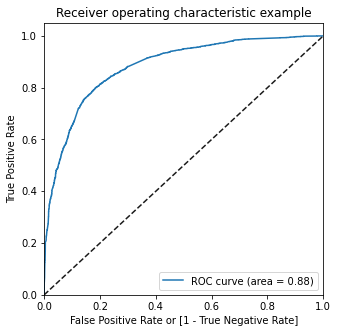

In [132]:
draw_roc(y_train_pred_final1.Converted, y_train_pred_final1.Converted_prob)

Since we have higher (0.88) area under the ROC curve , therefore our model is a good one.

### Finding Optimal Cutoff Point

#### Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final1[i]= y_train_pred_final1.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final1.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.180752,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.105612,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.487926,9226,0,1,1,1,1,1,0,0,0,0,0
3,1,0.845493,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.892423,7987,1,1,1,1,1,1,1,1,1,1,0


In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final1.Converted, y_train_pred_final1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.599906  0.973017  0.366197
0.2   0.2  0.727287  0.921504  0.605634
0.3   0.3  0.794521  0.836468  0.768246
0.4   0.4  0.813730  0.772281  0.839693
0.5   0.5  0.806802  0.666803  0.894494
0.6   0.6  0.794835  0.597711  0.918310
0.7   0.7  0.780035  0.515536  0.945711
0.8   0.8  0.755314  0.413737  0.969270
0.9   0.9  0.704613  0.249387  0.989757


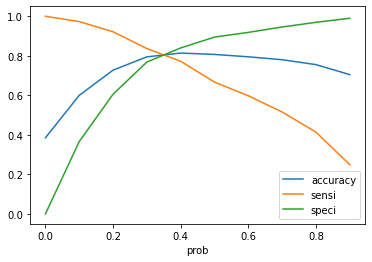

In [135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [136]:
y_train_pred_final1['final_predicted'] = y_train_pred_final1.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final1.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.180752,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.105612,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.487926,9226,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.845493,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.892423,7987,1,1,1,1,1,1,1,1,1,1,0,1


### Assigning Lead Score to the Training data

In [137]:
y_train_pred_final1['Lead_Score'] = y_train_pred_final1.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final1.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.180752,3009,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.105612,1012,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.487926,9226,0,1,1,1,1,1,0,0,0,0,0,1,49
3,1,0.845493,4750,1,1,1,1,1,1,1,1,1,1,0,1,85
4,1,0.892423,7987,1,1,1,1,1,1,1,1,1,1,0,1,89


### Model Evaluation

In [138]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final1.Converted, y_train_pred_final1.final_predicted))

Accuracy : 0.8068020784128483


In [139]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final1.Converted, y_train_pred_final1.final_predicted )
confusion2

array([[3154,  751],
       [ 476, 1970]], dtype=int64)

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8053965658217498


In [142]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8076824583866837


In [143]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : {}",FP/ float(TN+FP))

False Positive rate : {} 0.19231754161331627


In [144]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7239985299522235


In [145]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8688705234159779


### Precision and Recall

- Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
- Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [146]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final1.Converted, y_train_pred_final1.final_predicted )
confusion

array([[3154,  751],
       [ 476, 1970]], dtype=int64)

In [147]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7239985299522235


In [148]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.8053965658217498


Using sklearn utilities for the same

In [149]:
from sklearn.metrics import precision_score, recall_score

In [150]:
print("Precision :",precision_score(y_train_pred_final1.Converted , y_train_pred_final1.final_predicted))

Precision : 0.7239985299522235


In [151]:
print("Recall :",recall_score(y_train_pred_final1.Converted, y_train_pred_final1.final_predicted))

Recall : 0.8053965658217498


In [152]:
f1score = 2*((precision_score(y_train_pred_final1.Converted , y_train_pred_final1.final_predicted)*recall_score(y_train_pred_final1.Converted, y_train_pred_final1.final_predicted))/(precision_score(y_train_pred_final1.Converted , y_train_pred_final1.final_predicted)+recall_score(y_train_pred_final1.Converted, y_train_pred_final1.final_predicted)))

In [153]:
print(f1score)

0.7625314495838978


### Precision and recall tradeoff

In [154]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final1.Converted, y_train_pred_final1.final_predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: final_predicted, Length: 6351, dtype: int64)

In [155]:
p, r, thresholds = precision_recall_curve(y_train_pred_final1.Converted, y_train_pred_final1.Converted_prob)

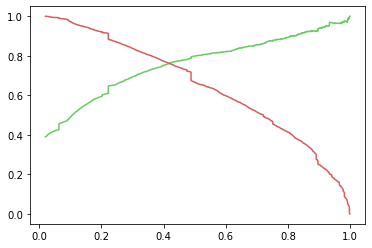

In [156]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The above graph shows the trade-off between the Precision and Recall ie., when thresholds are more, the precision will be more and recall will be less and vice-versa.

### Making predictions on the Test Data

In [157]:
#Rescaling the test data

In [158]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [159]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Other,Occupation_Working Professional
3271,0,-0.601776,0,0,0,0,1,0,0,0,1,0
1490,0,1.899087,1,0,0,0,1,0,0,0,0,1
7936,0,-0.754853,0,0,0,0,1,0,0,0,1,0
4216,0,-0.891330,0,1,0,1,1,0,0,0,0,0
3830,0,-0.588866,1,0,0,0,1,0,0,0,0,0


In [160]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.117332
1490    0.968585
7936    0.100904
4216    0.890810
3830    0.120632
1800    0.621947
6507    0.299078
4821    0.282922
4223    0.896028
4714    0.487926
dtype: float64

In [161]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [162]:
# Let's see the head
y_pred_1.head()

,0
3271,0.117332
1490,0.968585
7936,0.100904
4216,0.890810
3830,0.120632


In [163]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [164]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [165]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [166]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [167]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.117332
1,1,1490,0.968585
2,0,7936,0.100904
3,1,4216,0.890810
4,0,3830,0.120632


In [168]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [169]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [170]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.117332
1,1490,1,0.968585
2,7936,0,0.100904
3,4216,1,0.890810
4,3830,0,0.120632


In [171]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [172]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.117332,0
1,1490,1,0.968585,1
2,7936,0,0.100904,0
3,4216,1,0.890810,1
4,3830,0,0.120632,0


In [173]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8082996694821888


In [174]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1405,  329],
       [ 193,  796]], dtype=int64)

In [175]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [176]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8048533872598584


In [177]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8102652825836217


In [178]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.117332,0,12
1,1490,1,0.968585,1,97
2,7936,0,0.100904,0,10
3,4216,1,0.890810,1,89
4,3830,0,0.120632,0,12


### Conclusion

After running the model on the Test Data , we obtain:

* **Accuracy : 80.8 %**
* **Sensitivity : 80.4 %**
* **Specificity : 81.0 %**

### Comparing the values obtained for Train & Test:

#### Train Data: 

* **Accuracy : 80.6 %**
* **Sensitivity : 80.5 %**
* **Specificity : 80.7 %**

#### Test Data: 

* **Accuracy : 80.8 %**
* **Sensitivity : 80.4 %**
* **Specificity : 81.0 %**

**Hence We have achieved our overall goal of getting a ballpark target of lead conversion rate to be around 80%. Our Model seems to predict the conversion rate very well and so we can give the CEO confidence in making useful calls based on the model to get a higher lead convsersion rate of 80%**